# Introduction

In this project, we're working for an e-learning company that offers courses on programming.  Most of the courses are on web and mobile development, but other domains are covered such as data science, game development and so on.  We want to promote our product and to do this will invest some money into advertisement.  Our goal for this project is to find out the two best markets to advertise our product in.

Since organising surveys in different markets to identify which would be the best choice is costly, we'll begin by analysing an existing survey - [freeCodeCamp's 2017 New Coder Survey.](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) Their Medium publication has over 400,000 followers, and their survey attracted new coders with varying interests - ideal for our analysis! The survey data is publicly available in [this repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

# Reading and Exploring the Data

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
pd.set_option('display.max_columns', None)
survey.shape

(18175, 136)

In [270]:
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Identifying Representivity of Sample

For the purpose of the analysis, we're wanting to answer questions about a population of new coders that are interested in the subjects we teach.  We'd like to know:

* Where these new coders are located

* What are the locations with the greatest number of coders

* How much money new coders are willing to spend on learning

Before we do this however, we need to clarify whether the sample data we have is representative of our population of interest.

In [271]:
print(survey['JobRoleInterest'].value_counts(normalize=True) * 100)

Full-Stack Web Developer                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                  2.030892
  Mobile Developer                                                                                                                                                                      1.673341
Game Developer                     

It seems as though web development is a very popular interest, both in those selecting one job role and those selecting multiple interests.  We have a smaller number of users interested in roles such as data science, mobile development and game development.  Additionally, it is surprising to see so many people interested in multiple job roles - it would be nice to get a clearer picture of the data by splitting up the job roles to get a more comprehensive table.

We'll begin by dropping the null values in this column, and then splitting the strings up to find the number of options each participant chose.

In [272]:
dropped_nan = survey['JobRoleInterest'].dropna()

In [273]:
split_interests = dropped_nan.str.split(',')

In [274]:
n_options = split_interests.apply(lambda x: len(x))

In [275]:
n_options.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

We can see nearly a third of respondents chose one option, having a clear idea of what they are interested in/where they want to work. The next most common responses were those who chose 3, 4 or 5 interests. We should now see how many users are interested in web or mobile development, since that is the focus of our courses

In [276]:
interests_web_mobile = dropped_nan.str.contains('Web Developer|Mobile Developer')#does the string contain web developer or mobile developer

In [277]:
freq_table = interests_web_mobile.value_counts(normalize=True) * 100

In [278]:
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

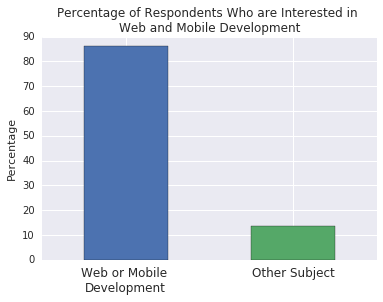

In [279]:
%matplotlib inline

freq_table.plot.bar()
plt.xticks([0,1],['Web or Mobile \nDevelopment', 'Other Subject'], rotation = 0, fontsize=12)
plt.ylabel('Percentage')
plt.title('Percentage of Respondents Who are Interested in \nWeb and Mobile Development')

It seems as though 86% of respondents to this survey are interested in Web or Mobile development, which is great news for us!  This indicates that the sample is indeed representative of our population of interest, and so we can carry on to the next section

# Identifying the locations of new coders

Now we have identified the sample is representative of our population of interest, we can start to answer the questions posed above.  To identify where the new coders live, we can use the 'CountryLive' variable which describes the country each participant lives in. We can use this country level information to identify the best 2 markets, or countries in this case to advertise in.

We'll drop missing values as it would be better to leave out the respondents that didn't answer which role they were interested in to ensure we're working with a representative sample.

In [280]:
survey_dropped = survey[survey['JobRoleInterest'].notnull()].copy()

In [281]:
survey_dropped['JobRoleInterest'].isnull().sum() #do we have any missing values left

0

In [282]:
freq_table_abs = survey_dropped['CountryLive'].value_counts()
freq_table_abs

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [283]:
freq_table_country_perc = survey_dropped['CountryLive'].value_counts(normalize=True) * 100
freq_table_country_perc

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

Far and away the country with the biggest percentage of respondents is the US with 46%.  This would imply that the US is definitely one of the markets that we should target. India is the country with the second largest number of respondents at 7.6%.  However, it is closer in the number of respondents to the rest of the countries than the US, so it would be prudent to consider other factors, such as the amount of purchasing power the coders have in each country.

# Calculating how much respondents would spend for learning

We'll narrow our analysis down to 4 countries for the next step -  the US, India, UK and Canada.  They are the most popular countries in this survey, and also as our courses are written in English, and English is an official language in all 4 of these countries, it would suit us better to target ads to English speaking users.

We'll start by calculating the amount of money a student has spent per month, using the 'MoneyForLearning' and 'MonthsProgramming' columns.  We'll replace rows where the student answered 0 months with 1 to avoid dividing by 0.

In [284]:
survey_dropped['MonthsProgramming'].replace(0,1, inplace=True)

In [285]:
survey_dropped['Spend_per_Month'] = survey_dropped['MoneyForLearning'] / survey_dropped['MonthsProgramming']

In [286]:
survey_dropped['Spend_per_Month'].isnull().sum()

675

In [287]:
survey_dropped = survey_dropped[survey_dropped['Spend_per_Month'].notnull()]#removing null values

In [288]:
survey_dropped = survey_dropped[survey_dropped['CountryLive'].notnull()]

In [289]:
survey_dropped['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [290]:
survey_grouped = survey_dropped.groupby('CountryLive') #grouping the data by country

In [291]:
mean_countries = survey_grouped['Spend_per_Month'].mean() #calculating the average spend
mean_countries = mean_countries[['United States of America', 'India', 'United Kingdom', 'Canada']]

In [292]:
mean_countries

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Spend_per_Month, dtype: float64

The US seems like a definite target market as it has the most respondents, and also the spending per month on courses is so much higher than the rest.  The UK and Canada are surprising relative to India as those countries have a higher GDP, amongst other economic measures so you'd expect respondents to have higher purchasing power.

A possibility that we need to consider is that there could be potential outliers skewing the data, so let's look at this in more detail.

# Investigating Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


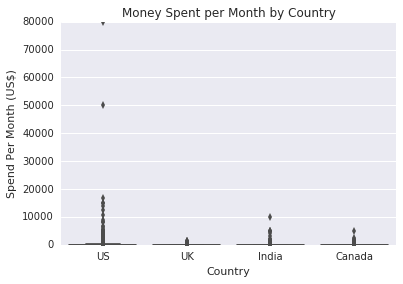

In [293]:
four_countries = survey_dropped[survey_dropped['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]
sns.boxplot(data=four_countries, x='CountryLive', y='Spend_per_Month')
plt.title('Money Spent per Month by Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Country')
plt.ylabel('Spend Per Month (US$)')

At this stage, we can't see if there's much wrong with the UK, India,or Canada -  however the US has some extreme outliers with people who spend up to 80,000 per month so we'll filter these out by only selecting rows with Spend per Month of less than 20,000, and recalculating the mean and then replotting the boxplots

In [294]:
survey_dropped = survey_dropped[survey_dropped['Spend_per_Month'] < 20000]
survey_grouped = survey_dropped.groupby('CountryLive')
mean_countries = survey_grouped['Spend_per_Month'].mean() #calculating the average spend
mean_countries = mean_countries[['United States of America', 'India', 'United Kingdom', 'Canada']]
mean_countries


CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Spend_per_Month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


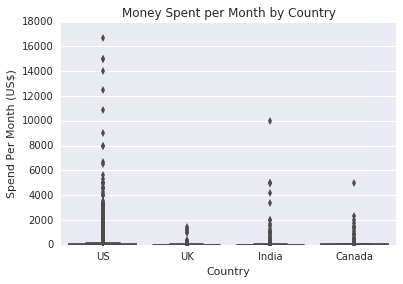

In [295]:
four_countries = survey_dropped[survey_dropped['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]
sns.boxplot(data=four_countries, x='CountryLive', y='Spend_per_Month')
plt.title('Money Spent per Month by Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Country')
plt.ylabel('Spend Per Month (US$)')

The boxplot is well resolved now and we can see outliers in India -  values over \$2500 per month so let's investigate these further.

In [296]:
india_outliers = four_countries[(four_countries['CountryLive'] == 'India') &(four_countries['Spend_per_Month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spend_per_Month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

We can see that none of these users attended a bootcamp, so it seems difficult to find a reason why they spent so much money - it could be they mistook the survey question *'Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?'* and factored in their university tuition, so let's remove these

In [297]:
four_countries =  four_countries.drop(india_outliers.index) #Dropping using the row labels

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


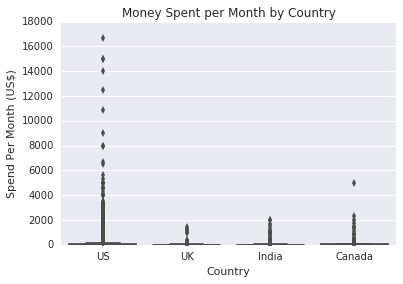

In [298]:
sns.boxplot(data=four_countries, x='CountryLive', y='Spend_per_Month')
plt.title('Money Spent per Month by Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Country')
plt.ylabel('Spend Per Month (US$)')

The US seems to have quite a few outliers (over $6000 per month spend) so let's investigate these.

In [299]:
us_outliers = four_countries[(four_countries['CountryLive'] == 'United States of America') & (four_countries['Spend_per_Month'] > 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spend_per_Month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

6 of the 11 respondents attended bootcamp, however the other 5 did not attend bootcamp so it'd be hard to justify the amount they spend. Additionally, when you look at the number of months some of these users spent programming there are 8 who haven't been programming for more than 3 months.  You'd imagine that they spent a large sum of money for a bootcamp which would last longer than this, so they likely wouldn't spend anything in the following months.  As a result, we'll remove those users who didn't attend bootcamps, and had been programming for 3 months or less by the time the survey was taken.

In [300]:
no_bootcamp = four_countries[
    (four_countries['CountryLive'] == 'United States of America') &
    (four_countries['Spend_per_Month'] >= 6000) &
    (four_countries['AttendedBootcamp'] == 0)        
]

four_countries = four_countries.drop(no_bootcamp.index)

In [301]:
less_than_three_months = four_countries[
    (four_countries['CountryLive'] == 'United States of America') &
    (four_countries['Spend_per_Month'] >= 6000) &
    (four_countries['MonthsProgramming'] <= 3)        
]

four_countries = four_countries.drop(less_than_three_months.index)

Lastly, let's take a look at the Canada outlier.

In [302]:
canada_outlier = four_countries[
    (four_countries['CountryLive'] == 'Canada') &
    (four_countries['Spend_per_Month'] >= 4500)
]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spend_per_Month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier is in a similar position to the outliers we found for the US - they attended a bootcamp but have only spent a short time programming - so we'll remove this outlier.

In [305]:
four_countries = four_countries.drop(canada_outlier.index)


In [306]:
four_countries_grouped = four_countries.groupby('CountryLive')
mean_countries = four_countries_grouped.mean()
mean_countries['Spend_per_Month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Spend_per_Month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


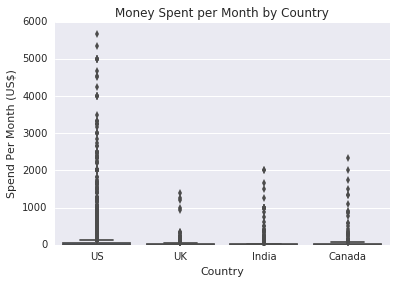

In [307]:
sns.boxplot(data=four_countries, x='CountryLive', y='Spend_per_Month')
plt.title('Money Spent per Month by Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Country')
plt.ylabel('Spend Per Month (US$)')

# Choosing the two best markets

Considering the results, the first country we should choose is definitely the US.  Lots of coders live there and they have much higher spending power than the other countries.  Given we sell subscriptions at \$59 per month, it is reasonable to choose India as they spend \$66 on average per month.  Canada is also a tempting choice however, with average spend around 50% higher than India. Let's take another look at the percentages of respondents.

In [308]:
four_countries['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

India does have nearly twice as many respondents as Canada, but there isn't really a crystal clear decision between the two. We could either:

* Advertise only in the US

* Advertise in US and India or US and Canada

* Advertise in all 3 countries

It makes sense to weight the budget towards the US given the superior metrics to the other countries - so something like 60% US, 20% India, 20% Canada could be a good option.

Since there isn't a clear cut answer here, this data would be most helpful if it was fed back to the marketing team and let them use their domain knowledge to make the best decision here.